# Insurance Charges Analysis and Prediction

This notebook performs **exploratory data analysis (EDA)** and builds **regression models** to predict medical insurance charges.  
The dataset contains information about age, sex, BMI, number of children, smoking status, region, and charges.  

We aim to answer the following questions:

### Exploratory Questions
- Do smokers have higher insurance costs on average compared to non-smokers?  
- How does BMI affect insurance costs (e.g., does obesity strongly increase charges)?  
- Are there cost differences between men and women?  
- Does the region (southeast, northwest, etc.) play a role in costs?  
- How do costs change with age?  

### Statistical / Modeling Questions
- What are the strongest drivers of insurance costs (age, smoking, BMI, children, etc.)?  
- Can we predict charges using a regression model?  
- How large is the difference in predicted costs between smokers and non-smokers with the same age and BMI?  

### Combination Questions
- Do smokers with a high BMI pay significantly more than non-smokers with a high BMI?  
- Is there an age threshold where costs increase sharply?  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load dataset and Show first rows
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
# Basic statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


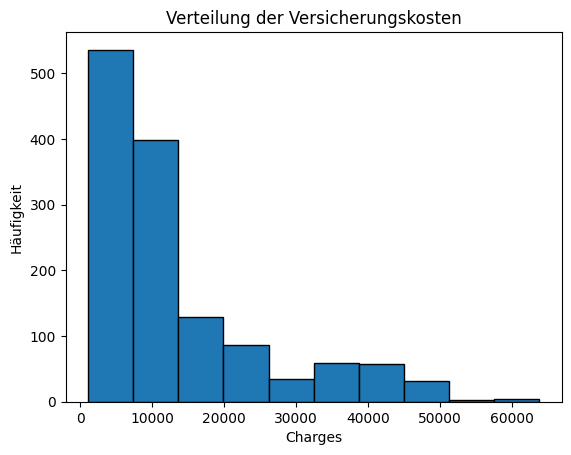

In [5]:
# Distribution of Insurance Charges

plt.hist(df['charges'], bins=10, edgecolor="black")
plt.xlabel("Charges")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Versicherungskosten")
plt.show()

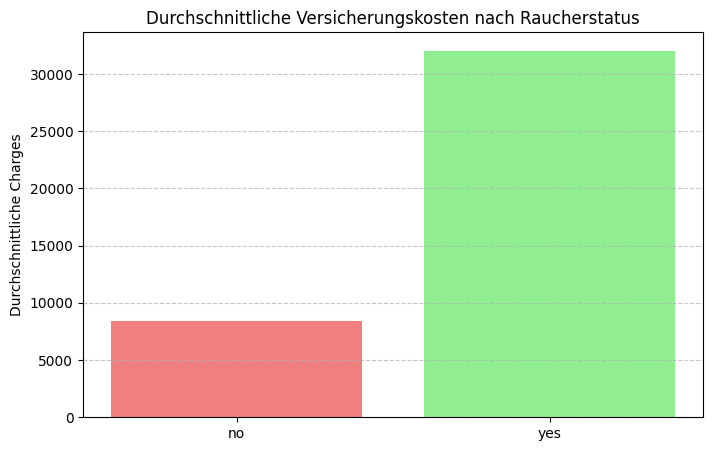

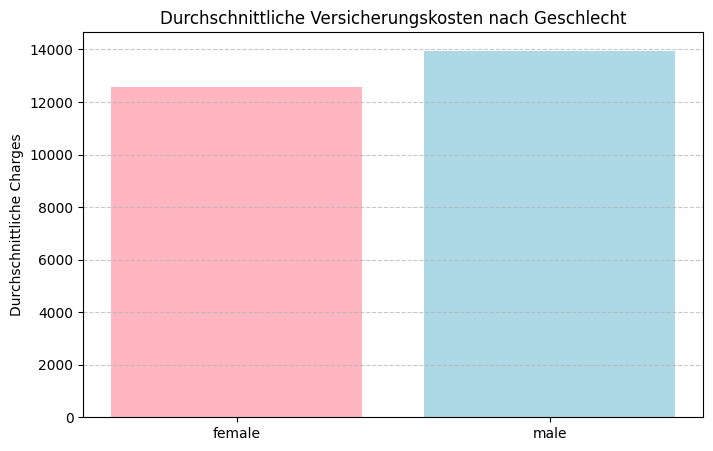

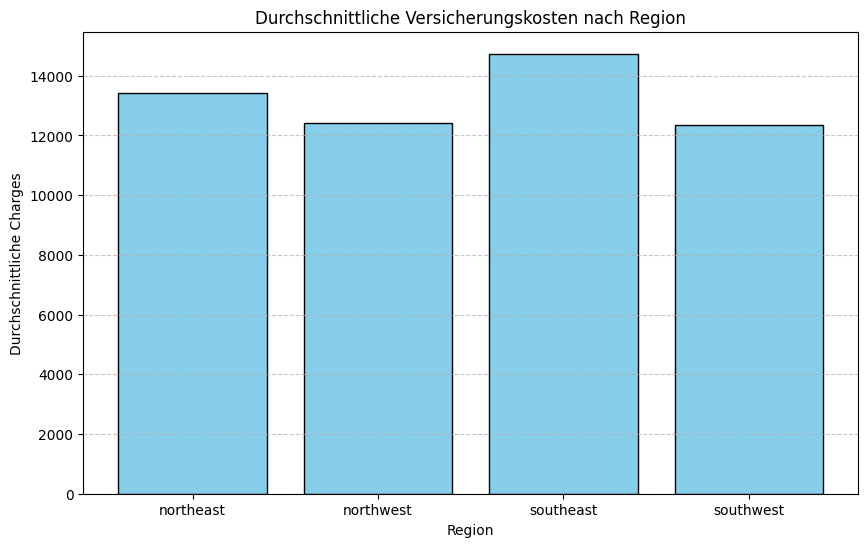

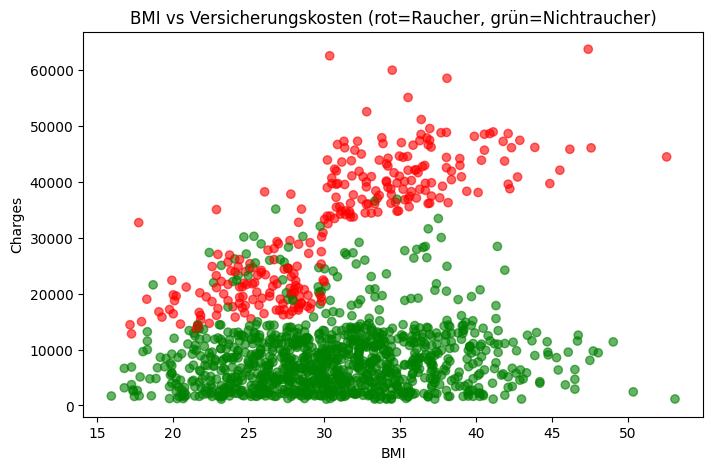

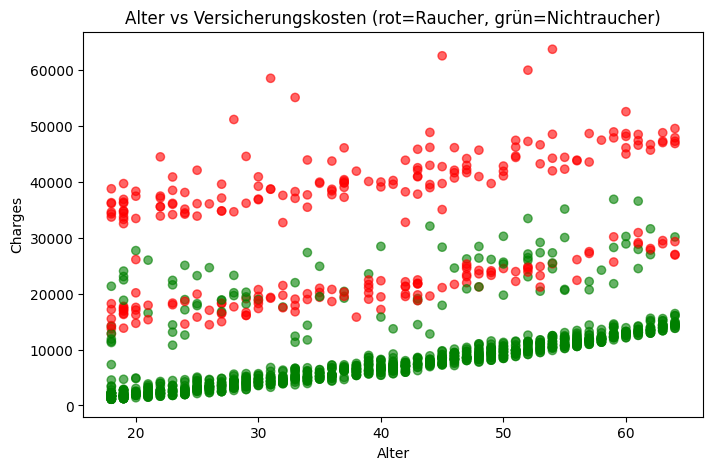

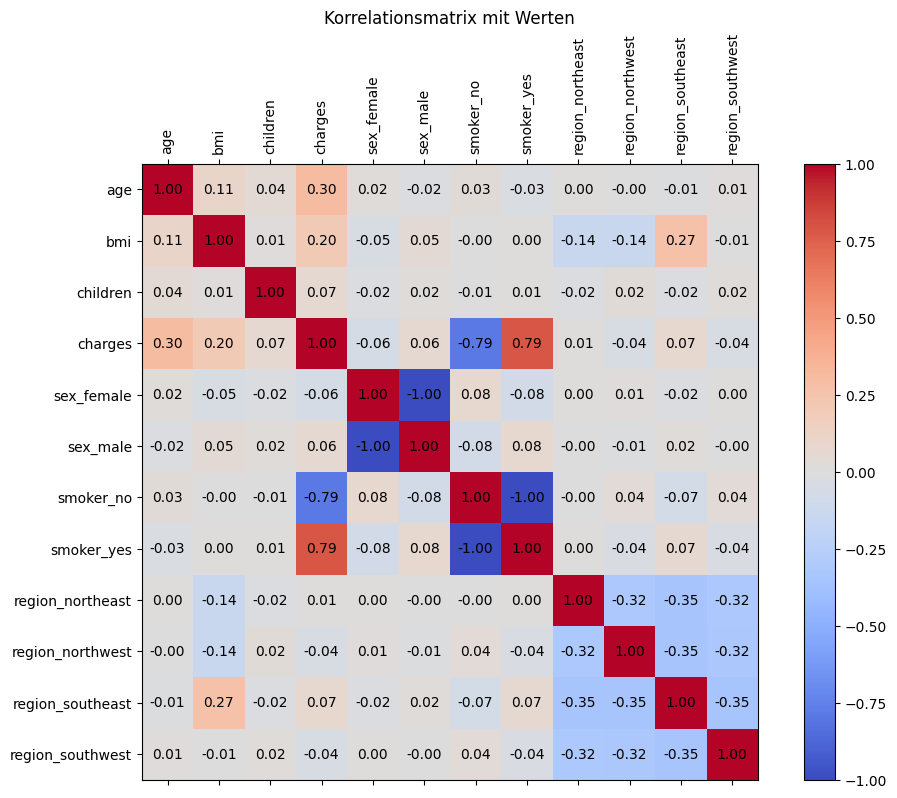


Durchschnittliche Kosten nach Raucherstatus:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Durchschnittliche Kosten nach Geschlecht:
sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


In [6]:

#  Average Charges by Smoker Status
avg_charges_smoker = df.groupby('smoker')['charges'].mean()
plt.figure(figsize=(8,5))
plt.bar(avg_charges_smoker.index, avg_charges_smoker.values, color=['lightcoral', 'lightgreen'])
plt.ylabel('Durchschnittliche Charges')
plt.title('Durchschnittliche Versicherungskosten nach Raucherstatus')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#  Average Charges by Gender
avg_charges_sex = df.groupby('sex')['charges'].mean()
plt.figure(figsize=(8,5))
plt.bar(avg_charges_sex.index, avg_charges_sex.values, color=['lightpink', 'lightblue'])
plt.ylabel('Durchschnittliche Charges')
plt.title('Durchschnittliche Versicherungskosten nach Geschlecht')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Average Charges by Region
avg_charges_region = df.groupby('region')['charges'].mean()

plt.figure(figsize=(10,6))
plt.bar(avg_charges_region.index, avg_charges_region.values, color='skyblue', edgecolor='black')
plt.ylabel('Durchschnittliche Charges')
plt.xlabel('Region')
plt.title('Durchschnittliche Versicherungskosten nach Region')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Scatter Plot: BMI vs Charges (Colored by Smoker Status)
colors = df['smoker'].map({'yes':'red', 'no':'green'})
plt.figure(figsize=(8,5))
plt.scatter(df['bmi'], df['charges'], c=colors, alpha=0.6)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Versicherungskosten (rot=Raucher, grün=Nichtraucher)')
plt.show()

# Scatter Plot: Age vs Charges (Colored by Smoker Status)
plt.figure(figsize=(8,5))
plt.scatter(df['age'], df['charges'], c=colors, alpha=0.6)
plt.xlabel('Alter')
plt.ylabel('Charges')
plt.title('Alter vs Versicherungskosten (rot=Raucher, grün=Nichtraucher)')
plt.show()


# Correlation Matrix with Dummy Variables
df_encoded = pd.get_dummies(df,dtype=int)


corr = df_encoded.corr()
fig, ax = plt.subplots(figsize=(12,8))
cax = ax.matshow(corr, cmap='coolwarm')

fig.colorbar(cax)

# Achsenbeschriftungen
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

# Zahlen in den Zellen einfügen
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.title('Korrelationsmatrix mit Werten')
plt.show()
# Gruppenanalyse: Durchschnittliche Kosten nach Raucherstatus
print("\nDurchschnittliche Kosten nach Raucherstatus:")
print(df.groupby('smoker')['charges'].mean())

# Durchschnittliche Kosten nach Geschlecht
print("\nDurchschnittliche Kosten nach Geschlecht:")
print(df.groupby('sex')['charges'].mean())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# Prepare Data for Modeling  and Define features and target
df = pd.read_csv("insurance.csv")
X = pd.get_dummies(df.drop('charges', axis=1), drop_first=True)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate Multiple Models
models = {
    "Lineare Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42)
}
valuation_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}: MAE={mean_absolute_error(y_test, y_pred):.2f}, R²={r2_score(y_test, y_pred):.2f}")
    valuation_models [name] = (mean_absolute_error(y_test, y_pred),r2_score(y_test,y_pred))

best_name, best_scores = max(valuation_models.items(),key= lambda x : x[1][1])

print(f"The Best model that fits these insurance Data is {best_name} with R²={valuation_models[name][1]:.2f}")

# # Train Best Model on Full Data and Save
best_model = models[best_name].fit(X, y)

import pickle as pcl

try:
    with open('Training_insurance.dat', 'wb') as file:
        pcl.dump(best_model, file)
    print("Modell erfolgreich gespeichert als 'Training_insurance.dat'")
except (IOError, FileNotFoundError):
    print("Fehler: Modell konnte nicht gespeichert werden.")


Lineare Regression: MAE=4181.19, R²=0.78
Decision Tree: MAE=3195.11, R²=0.73
Random Forest: MAE=2559.90, R²=0.86
Gradient Boosting: MAE=2492.64, R²=0.87
The Best model that fits these insurance Data is Gradient Boosting with R²=0.87
Modell erfolgreich gespeichert als 'Training_insurance.dat'
